## Imports

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import ticker
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import statsmodels.tsa.api as tsa

#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

## Setting figures to timeseries-friendly
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['figure.facecolor'] = 'white'
sns.set_context("talk", font_scale=0.9)

# set random seed
SEED = 321
np.random.seed(SEED)

#display more columns
pd.set_option('display.max_columns',50)

In [2]:
# Loading in data
OUTPUT_FOLDER = 'Data/Chicago/'
crime_files = sorted(glob.glob(OUTPUT_FOLDER+"*.csv"))
df = pd.concat([pd.read_csv(f) for f in crime_files])
df


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1311226,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.0,NaN,41.945072,-87.684629
1,1311049,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,OTHER,False,False,1724,17.0,NaN,41.954010,-87.709858
2,3212105,01/01/2001 01:00:00 AM,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,True,False,913,9.0,14.0,41.823730,-87.698440
3,1313213,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,VEHICLE NON-COMMERCIAL,False,True,731,7.0,NaN,41.765396,-87.626698
4,1311503,01/01/2001 01:00:00 AM,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER DANG WEAPON,BAR OR TAVERN,False,False,1933,19.0,NaN,41.931374,-87.648819
...,...,...,...,...,...,...,...,...,...,...,...,...
106395,13100032,06/07/2023 12:50:00 PM,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,SMALL RETAIL STORE,False,False,2512,25.0,36.0,41.923661,-87.786801
106396,13099116,06/07/2023 12:50:00 PM,MOTOR VEHICLE THEFT,AUTOMOBILE,OTHER (SPECIFY),False,False,1513,15.0,29.0,41.877066,-87.768431
106397,13098700,06/07/2023 12:50:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1634,16.0,31.0,41.941143,-87.756770
106398,13099211,06/07/2023 12:50:00 PM,CRIMINAL DAMAGE,TO VEHICLE,RESIDENCE - GARAGE,False,False,511,5.0,9.0,41.713628,-87.627269


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7818535 entries, 0 to 106399
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 671.1+ MB


In [4]:
# Changing the 'Date' column to datetime
df['Datetime'] = pd.to_datetime(df['Date'], errors='coerce')

In [5]:
# Checking if there are any null values
df['Datetime'].isna().sum()

0

In [6]:
# Now making the Date column as the new index
df = df.set_index('Datetime')
df.head(3)

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Datetime,,,,,,,,,,,,
2001-01-01 01:00:00,1311226,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1913,19.0,NaN,41.945072,-87.684629
2001-01-01 01:00:00,1311049,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,OTHER,False,False,1724,17.0,NaN,41.954010,-87.709858
2001-01-01 01:00:00,3212105,01/01/2001 01:00:00 AM,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,True,False,913,9.0,14.0,41.823730,-87.698440


In [7]:
# Dropping columns unnecessary to the Stake Holder Questions
df = df.drop(columns=['ID', 'Latitude',
                      'Longitude', 'Arrest',
                      'Domestic', 'Ward', 'Beat',
                      'Location Description', 'Date'] )
df.head()

,Primary Type,Description,District
Datetime,,,
2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,19.0
2001-01-01 01:00:00,CRIMINAL DAMAGE,TO PROPERTY,17.0
2001-01-01 01:00:00,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,9.0
2001-01-01 01:00:00,BATTERY,SIMPLE,7.0
2001-01-01 01:00:00,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER DANG WEAPON,19.0


## Stakeholder Questions to Answer

### 1) Comparing Police Districts:

Which district has the most crimes? Which has the least?

In [8]:
# Grouping the data by district
crimes_by_district = df.groupby('Primary Type')['District'].value_counts().sort_index()
crimes_by_district

Primary Type       District
ARSON              1.0          125
                   2.0          340
                   3.0          544
                   4.0          835
                   5.0          734
                               ... 
WEAPONS VIOLATION  19.0        1209
                   20.0         623
                   22.0        3674
                   24.0        1746
                   25.0        6270
Name: District, Length: 755, dtype: int64

In [9]:
# Creating a plotting dataframe
plot_df = crimes_by_district.to_frame('# of Crimes').reset_index()
plot_df

,Primary Type,District,# of Crimes
0,ARSON,1.0,125
1,ARSON,2.0,340
2,ARSON,3.0,544
3,ARSON,4.0,835
4,ARSON,5.0,734
...,...,...,...
750,WEAPONS VIOLATION,19.0,1209
751,WEAPONS VIOLATION,20.0,623
752,WEAPONS VIOLATION,22.0,3674
753,WEAPONS VIOLATION,24.0,1746


In [10]:
crimes_by_district.agg(['idxmin','idxmax'])

idxmin    (CONCEALED CARRY LICENSE VIOLATION, 31.0)
idxmax                                (THEFT, 18.0)
Name: District, dtype: object

### 2) Crimes Across the Years:

- Is the total number of crimes increasing or decreasing across the years? 
- Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

In [11]:
# Resampling the data as annual
df_year = df.groupby('Primary Type').resample('A').sum().reset_index()
df_year

C:\Users\amnam\AppData\Local\Temp\ipykernel_32756\496633399.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_year = df.groupby('Primary Type').resample('A').sum().reset_index()
C:\Users\amnam\AppData\Local\Temp\ipykernel_32756\496633399.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_year = df.groupby('Primary Type').resample('A').sum().reset_index()
C:\Users\amnam\AppData\Local\Temp\ipykernel_32756\496633399.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select o

C:\Users\amnam\AppData\Local\Temp\ipykernel_32756\496633399.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_year = df.groupby('Primary Type').resample('A').sum().reset_index()
C:\Users\amnam\AppData\Local\Temp\ipykernel_32756\496633399.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_year = df.groupby('Primary Type').resample('A').sum().reset_index()
C:\Users\amnam\AppData\Local\Temp\ipykernel_32756\496633399.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select o

,Primary Type,Datetime,District
0,ARSON,2001-12-31,11870.0
1,ARSON,2002-12-31,12169.0
2,ARSON,2003-12-31,10627.0
3,ARSON,2004-12-31,9509.0
4,ARSON,2005-12-31,7930.0
...,...,...,...
749,WEAPONS VIOLATION,2019-12-31,59551.0
750,WEAPONS VIOLATION,2020-12-31,79120.0
751,WEAPONS VIOLATION,2021-12-31,87874.0
752,WEAPONS VIOLATION,2022-12-31,85167.0


In [12]:
years_ts = df_year.pivot(index='Datetime',columns='Primary Type')
years_ts.head()

District                                \
Primary Type    ARSON   ASSAULT   BATTERY  BURGLARY   
Datetime                                              
2001-12-31    11870.0  340790.0  993801.0  311324.0   
2002-12-31    12169.0  335323.0  997931.0  312809.0   
2003-12-31    10627.0  309417.0  942001.0  299164.0   
2004-12-31     9509.0  305270.0  930561.0  289627.0   
2005-12-31     7930.0  287972.0  897988.0  297382.0   

                                                                    \
Primary Type CONCEALED CARRY LICENSE VIOLATION CRIM SEXUAL ASSAULT   
Datetime                                                             
2001-12-31                                18.0             18710.0   
2002-12-31                                 0.0             19450.0   
2003-12-31                                 0.0             17026.0   
2004-12-31                                 0.0             16203.0   
2005-12-31                                 0.0             16476.0   

                                                                        \
Primary Type CRIMINAL DAMAGE CRIMINAL SEXUAL ASSAULT CRIMINAL TRESPASS   
Datetime                                                                 
2001-12-31          650584.0                   324.0          140163.0   
2002-12-31          650645.0                   264.0          147172.0   
2003-12-31          642691.0                   494.0          154185.0   
2004-12-31          620333.0                   388.0          164902.0   
2005-12-31          625683.0                   392.0          171530.0   

                                                                     \
Primary Type DECEPTIVE PRACTICE DOMESTIC VIOLENCE GAMBLING HOMICIDE   
Datetime                                                              
2001-12-31             177736.0               4.0   9785.0   6872.0   
2002-12-31             170515.0               NaN  10453.0   6933.0   
2003-12-31             163946.0               NaN  11397.0   6318.0   
2004-12-31             160638.0               NaN  10891.0   4621.0   
2005-12-31             163124.0               NaN  10731.0   4694.0   

                                                                              \
Primary Type HUMAN TRAFFICKING INTERFERENCE WITH PUBLIC OFFICER INTIMIDATION   
Datetime                                                                       
2001-12-31                 NaN                           4589.0       3042.0   
2002-12-31                 NaN                           4216.0       3551.0   
2003-12-31                 NaN                           4904.0       3508.0   
2004-12-31                 NaN                           5978.0       3663.0   
2005-12-31                 NaN                           7654.0       2885.0   

                                                                            \
Primary Type KIDNAPPING LIQUOR LAW VIOLATION MOTOR VEHICLE THEFT NARCOTICS   
Datetime                                                                     
2001-12-31      11361.0              22456.0            324775.0  556089.0   
2002-12-31       9772.0              19385.0            292029.0  575754.0   
2003-12-31       7589.0              18138.0            259801.0  608187.0   
2004-12-31       5921.0              13257.0            259774.0  615723.0   
2005-12-31       4614.0              14440.0            256073.0  622544.0   

                                                                           \
Primary Type NON - CRIMINAL NON-CRIMINAL NON-CRIMINAL (SUBJECT SPECIFIED)   
Datetime                                                                    
2001-12-31              NaN          NaN                              NaN   
2002-12-31              NaN          NaN                              NaN   
2003-12-31              NaN         25.0                              NaN   
2004-12-31              NaN          0.0                              NaN   
2005-12-31              NaN          0.0    

In [13]:
years_ts.columns

MultiIndex([('District',                             'ARSON'),
            ('District',                           'ASSAULT'),
            ('District',                           'BATTERY'),
            ('District',                          'BURGLARY'),
            ('District', 'CONCEALED CARRY LICENSE VIOLATION'),
            ('District',               'CRIM SEXUAL ASSAULT'),
            ('District',                   'CRIMINAL DAMAGE'),
            ('District',           'CRIMINAL SEXUAL ASSAULT'),
            ('District',                 'CRIMINAL TRESPASS'),
            ('District',                'DECEPTIVE PRACTICE'),
            ('District',                 'DOMESTIC VIOLENCE'),
            ('District',                          'GAMBLING'),
            ('District',                          'HOMICIDE'),
            ('District',                 'HUMAN TRAFFICKING'),
            ('District',  'INTERFERENCE WITH PUBLIC OFFICER'),
            ('District',                      'INTIMIDA

In [14]:
years_ts.columns = years_ts.columns.droplevel(0)
years_ts.columns

Index(['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
       'CONCEALED CARRY LICENSE VIOLATION', 'CRIM SEXUAL ASSAULT',
       'CRIMINAL DAMAGE', 'CRIMINAL SEXUAL ASSAULT', 'CRIMINAL TRESPASS',
       'DECEPTIVE PRACTICE', 'DOMESTIC VIOLENCE', 'GAMBLING', 'HOMICIDE',
       'HUMAN TRAFFICKING', 'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION',
       'KIDNAPPING', 'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT',
       'NARCOTICS', 'NON - CRIMINAL', 'NON-CRIMINAL',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'OBSCENITY',
       'OFFENSE INVOLVING CHILDREN', 'OTHER NARCOTIC VIOLATION',
       'OTHER OFFENSE', 'PROSTITUTION', 'PUBLIC INDECENCY',
       'PUBLIC PEACE VIOLATION', 'RITUALISM', 'ROBBERY', 'SEX OFFENSE',
       'STALKING', 'THEFT', 'WEAPONS VIOLATION'],
      dtype='object', name='Primary Type')

Checking Change in crimes from 2001 to 2022

In [15]:
# Substract to get delta crmes
delta_crime_yrs = years_ts.loc['2022-12-31'] - years_ts.loc['2001-12-31']
delta_crime_yrs

Primary Type
ARSON                                 -7173.0
ASSAULT                             -120489.0
BATTERY                             -548465.0
BURGLARY                            -222920.0
CONCEALED CARRY LICENSE VIOLATION      2137.0
CRIM SEXUAL ASSAULT                       NaN
CRIMINAL DAMAGE                     -354780.0
CRIMINAL SEXUAL ASSAULT               18937.0
CRIMINAL TRESPASS                    -89412.0
DECEPTIVE PRACTICE                    29421.0
DOMESTIC VIOLENCE                         NaN
GAMBLING                              -9689.0
HOMICIDE                                118.0
HUMAN TRAFFICKING                         NaN
INTERFERENCE WITH PUBLIC OFFICER       -660.0
INTIMIDATION                           -634.0
KIDNAPPING                           -10103.0
LIQUOR LAW VIOLATION                 -19896.0
MOTOR VEHICLE THEFT                 -101283.0
NARCOTICS                           -499830.0
NON - CRIMINAL                            NaN
NON-CRIMINAL         

In [16]:
delta_crime_yrs.isna().sum()

7

In [17]:
## fill null values with 0
delta_crime_yrs = delta_crime_yrs.fillna(0)
delta_crime_yrs

Primary Type
ARSON                                 -7173.0
ASSAULT                             -120489.0
BATTERY                             -548465.0
BURGLARY                            -222920.0
CONCEALED CARRY LICENSE VIOLATION      2137.0
CRIM SEXUAL ASSAULT                       0.0
CRIMINAL DAMAGE                     -354780.0
CRIMINAL SEXUAL ASSAULT               18937.0
CRIMINAL TRESPASS                    -89412.0
DECEPTIVE PRACTICE                    29421.0
DOMESTIC VIOLENCE                         0.0
GAMBLING                              -9689.0
HOMICIDE                                118.0
HUMAN TRAFFICKING                         0.0
INTERFERENCE WITH PUBLIC OFFICER       -660.0
INTIMIDATION                           -634.0
KIDNAPPING                           -10103.0
LIQUOR LAW VIOLATION                 -19896.0
MOTOR VEHICLE THEFT                 -101283.0
NARCOTICS                           -499830.0
NON - CRIMINAL                            0.0
NON-CRIMINAL         

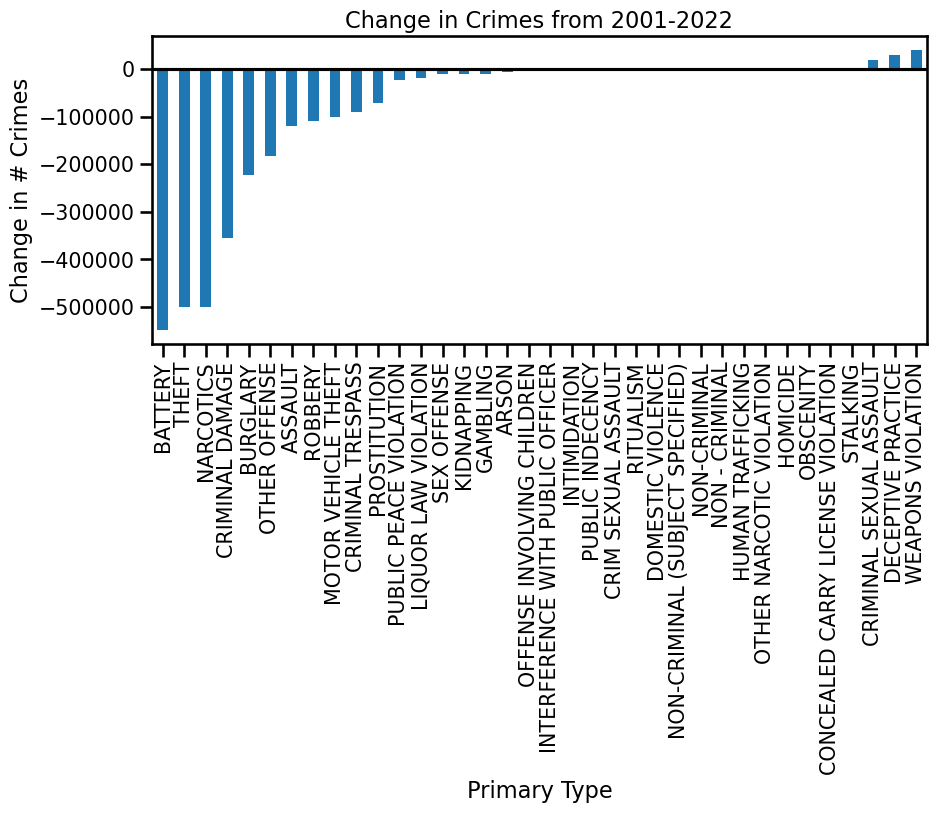

In [18]:
ax = delta_crime_yrs.sort_values().plot(kind='bar',figsize=(10,4),
                                       ylabel='Change in # Crimes',
                                       title='Change in Crimes from 2001-2022')
ax.axhline(0,color='k');

Overall crimes decreased over time since 2001.

### 3) Comparing Months:

- What months have the most crime? What months have the least?
- Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [19]:
# Adding in MonthName and Month columns
df['Month'] = df.index.month
df['MonthName'] = df.index.month_name()
df.head()

,Primary Type,Description,District,Month,MonthName
Datetime,,,,,
2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,19.0,1,January
2001-01-01 01:00:00,CRIMINAL DAMAGE,TO PROPERTY,17.0,1,January
2001-01-01 01:00:00,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,9.0,1,January
2001-01-01 01:00:00,BATTERY,SIMPLE,7.0,1,January
2001-01-01 01:00:00,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER DANG WEAPON,19.0,1,January


In [20]:
# Resampling data for monthly
crimes_by_month = df.groupby("Month")['Primary Type'].value_counts().sort_index()
crimes_by_month

Month  Primary Type                     
1      ARSON                                   963
       ASSAULT                               36518
       BATTERY                              104465
       BURGLARY                              33316
       CONCEALED CARRY LICENSE VIOLATION        82
                                             ...  
12     ROBBERY                               25749
       SEX OFFENSE                            1903
       STALKING                                332
       THEFT                                126634
       WEAPONS VIOLATION                      7401
Name: Primary Type, Length: 415, dtype: int64

In [21]:
# Convert to dataframe and reset_index()
plot_df = crimes_by_month.to_frame('# of Crimes').reset_index()
plot_df

,Month,Primary Type,# of Crimes
0,1,ARSON,963
1,1,ASSAULT,36518
2,1,BATTERY,104465
3,1,BURGLARY,33316
4,1,CONCEALED CARRY LICENSE VIOLATION,82
...,...,...,...
410,12,ROBBERY,25749
411,12,SEX OFFENSE,1903
412,12,STALKING,332
413,12,THEFT,126634


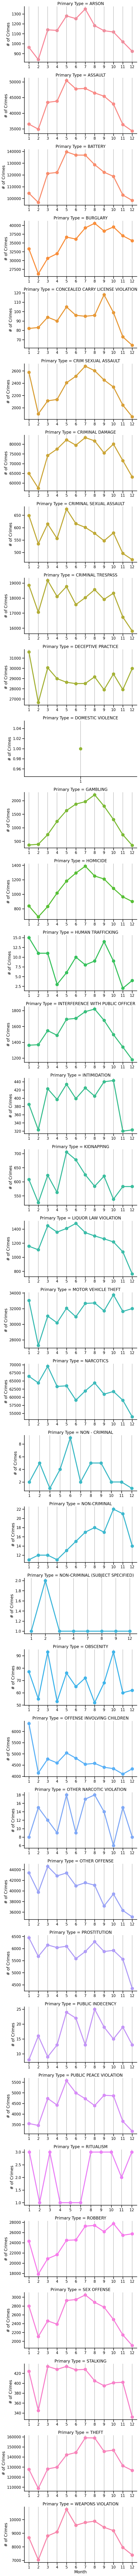

In [22]:
g = sns.catplot(data=plot_df, x='Month', y='# of Crimes',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=1,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];

### Calculating Change in crimes from 2001 to 2022

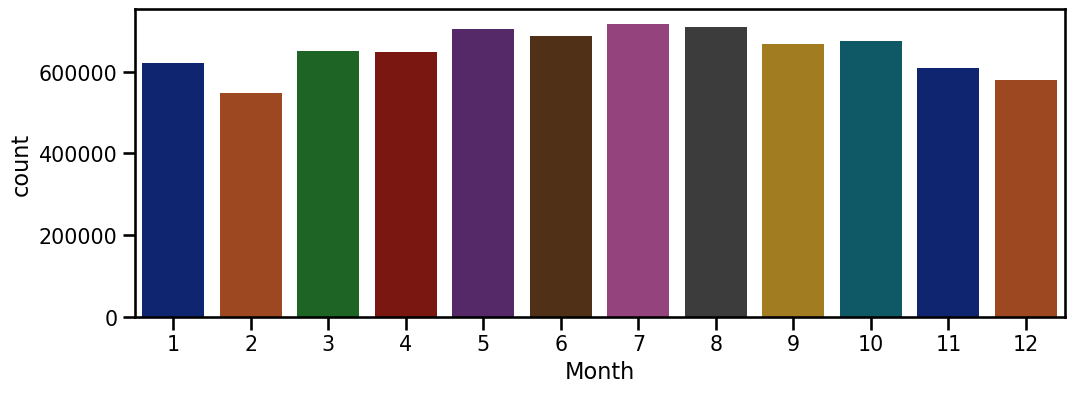

In [23]:
sns.countplot(data=df, x='Month',palette='dark');

In [24]:
# Saving lookup for number vs name
unique_mon = df.drop_duplicates(subset=['Month']).sort_values('Month')
mon_lookup =dict(zip(unique_mon['Month'],unique_mon['MonthName']))
mon_lookup

{1: 'January',
 2: 'February',
 3: 'March',
 4: 'April',
 5: 'May',
 6: 'June',
 7: 'July',
 8: 'August',
 9: 'September',
 10: 'October',
 11: 'November',
 12: 'December'}

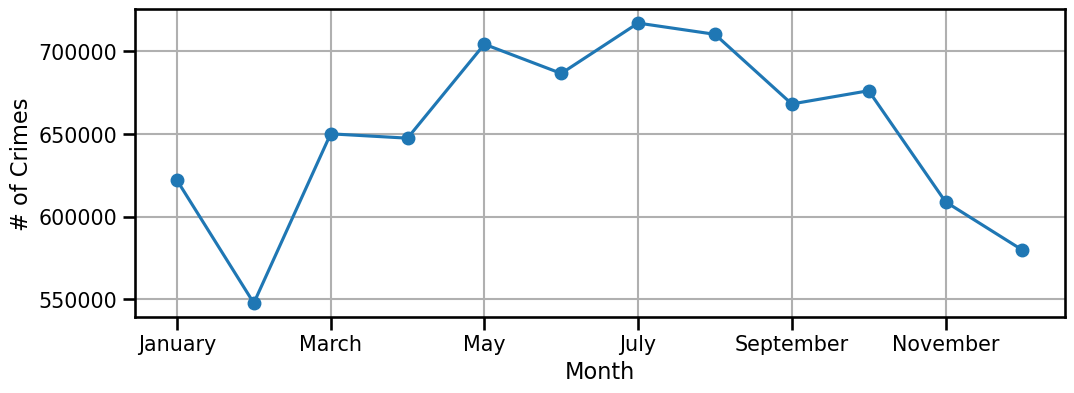

In [25]:
# Save month counts
mon_counts = df['MonthName'].value_counts()[mon_lookup.values()]
ax = mon_counts.plot(style='o-',grid=True,
                       ylabel='# of Crimes',
                       xlabel='Month');

In [26]:
df['Month'].value_counts()

7     717159
8     710353
5     704363
6     686650
10    676190
9     668167
3     650081
4     647455
1     622000
11    608890
12    579669
2     547558
Name: Month, dtype: int64

Months with most crime are as follows:

- May
- July
- August

Months with least crime are as follows:

- February
- November
- December